## Introduction to CNN

#### Table of Contents

##### Data Collection and Preparation
- [Import data from GitHub](#import-data-from-github)
- [Merge carrot datasets](#merge-carrot-datasets)
- [Merge cucumber datasets](#merge-cucumber-datasets)
- [Remove unnecessary files](#remove-unnecessary-files-in-our-datasets-folder)
- [Preprocessing images](#preprocessing-the-images)
- [Verifying image formats](#verifying-image-formats)

##### Model Development
- [Training CNN](#training-cnn)

##### Model Evaluation
- [Plot performance](#plot-performance)
- [Evaluate performance on test set](#evaluate-performance-on-test-set)

##### Model Testing
- [Testing on new data](#testing-on-new-data)

##### [Conclusion](#conclusion)

In [43]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf

In [44]:
!pip install rarfile

In [45]:
# Enable GPU usage and configure TensorFlow to manage GPU memory efficiently
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus :
  tf.config.experimental.set_memory_growth(gpu, True)

### Import data from github

In [46]:
import pathlib
import os
import rarfile
import shutil

# Define the URLs of the rar files
rar_urls = [
    "https://github.com/keliansl/CNN-introduction/raw/main/data/carrot_1.rar",
    "https://github.com/keliansl/CNN-introduction/raw/main/data/carrot_2.rar"
]

# Create a directory to store the datasets
datasets_path = "/content/datasets"

# Remove the existing dataset folder if it already exists
if os.path.exists(datasets_path):
    shutil.rmtree(datasets_path)  # Deletes the folder and all its contents

# Recreate the empty datasets folder
os.makedirs(datasets_path, exist_ok=True)

for i, url in enumerate(rar_urls):
    # Download the rar file
    rar_path = tf.keras.utils.get_file(
        f"carrot_{i+1}.rar",
        url,
        extract=False,
        cache_dir='/content'
    )

    # Extract the rar file directly into /content/datasets
    with rarfile.RarFile(rar_path) as rf:
        rf.extractall(datasets_path)  # Extract directly into /content/datasets

# Example: Check the extracted files
print("Extracted files:", os.listdir(datasets_path))

8801424/8801424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
25467696/25467696 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Extracted files: ['carrot_2', 'carrot_2.rar', 'carrot_1', 'carrot_1.rar']


In [47]:
import pathlib
import os
import tensorflow as tf
import rarfile

# Define the URLs of the rar files
rar_urls = [
    "https://github.com/keliansl/CNN-introduction/raw/main/data/cucumber_1.rar",
    "https://github.com/keliansl/CNN-introduction/raw/main/data/cucumber_2.rar"
]

# Create a directory to store the datasets
datasets_path = "/content/datasets"
os.makedirs(datasets_path, exist_ok=True)

for i, url in enumerate(rar_urls):
    # Download the rar file
    rar_path = tf.keras.utils.get_file(
        f"cucumber_{i+1}.rar",
        url,
        extract=False,
        cache_dir='/content'
    )

    # Extract the rar file directly into /content/datasets
    with rarfile.RarFile(rar_path) as rf:
        rf.extractall(datasets_path)  # Extract directly into /content/datasets

# Example: Check the extracted files
print("Extracted files:", os.listdir(datasets_path))

11511246/11511246 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
14922888/14922888 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Extracted files: ['cucumber_2.rar', 'cucumber_2', 'cucumber_1', 'carrot_2', 'carrot_2.rar', 'cucumber_1.rar', 'carrot_1', 'carrot_1.rar']


In [48]:
from PIL import Image

# Load the image
image_path = "/content/datasets/carrot_1/1-2-700x700.png"
image = Image.open(image_path).convert('RGB')

In [49]:
data_dir = pathlib.Path('/content/datasets/carrot_1')

image_count = len(list(data_dir.glob('*/*')))
image_count

0

### Merge carrot datasets

In [50]:
import os
import shutil

# Define the source directories
carrot_dir1 = "/content/datasets/carrot_1"
carrot_dir2 = "/content/datasets/carrot_2"

# Define the destination directory
merged_carrot_dir = "/content/datasets/carrot"

# Create the merged directory if it doesn't exist
os.makedirs(merged_carrot_dir, exist_ok=True)

# Function to copy files while handling potential errors
def copy_files(src_dir, dst_dir):
    for filename in os.listdir(src_dir):
        src_file = os.path.join(src_dir, filename)
        dst_file = os.path.join(dst_dir, filename)
        try:
            if os.path.isfile(src_file):
                shutil.copy2(src_file, dst_file)  # copy2 preserves metadata
            elif os.path.isdir(src_file):
                shutil.copytree(src_file, dst_file)
        except OSError as e:
            print(f"Error copying {src_file}: {e}")


# Copy files from carrot_1
copy_files(carrot_dir1, merged_carrot_dir)

# Copy files from carrot_2, handling potential file name conflicts
for filename in os.listdir(carrot_dir2):
    src_file = os.path.join(carrot_dir2, filename)
    dst_file = os.path.join(merged_carrot_dir, filename)
    if os.path.exists(dst_file):
        # Handle file name conflicts (e.g., append a counter)
        i = 1
        base, ext = os.path.splitext(filename)
        new_filename = f"{base}_{i}{ext}"
        dst_file = os.path.join(merged_carrot_dir, new_filename)
        while os.path.exists(dst_file):
            i += 1
            new_filename = f"{base}_{i}{ext}"
            dst_file = os.path.join(merged_carrot_dir, new_filename)
    try:
        if os.path.isfile(src_file):
          shutil.copy2(src_file, dst_file)
        elif os.path.isdir(src_file):
          shutil.copytree(src_file, dst_file)
    except OSError as e:
        print(f"Error copying {src_file}: {e}")


print(f"Merged carrot images into: {merged_carrot_dir}")


Merged carrot images into: /content/datasets/carrot


### Merge cucumber datasets

In [51]:
import os
import shutil

# Define the source directories
cucumber_dir1 = "/content/datasets/cucumber_1"
cucumber_dir2 = "/content/datasets/cucumber_2"

# Define the destination directory
merged_cucumber_dir = "/content/datasets/cucumber"

# Create the merged directory if it doesn't exist
os.makedirs(merged_cucumber_dir, exist_ok=True)

# Function to copy files while handling potential errors
def copy_files(src_dir, dst_dir):
    for filename in os.listdir(src_dir):
        src_file = os.path.join(src_dir, filename)
        dst_file = os.path.join(dst_dir, filename)
        try:
            if os.path.isfile(src_file):
                shutil.copy2(src_file, dst_file)  # copy2 preserves metadata
            elif os.path.isdir(src_file):
                shutil.copytree(src_file, dst_file)
        except OSError as e:
            print(f"Error copying {src_file}: {e}")


# Copy files from cucumber_1
copy_files(cucumber_dir1, merged_cucumber_dir)

# Copy files from cucumber_2, handling potential file name conflicts
for filename in os.listdir(cucumber_dir2):
    src_file = os.path.join(cucumber_dir2, filename)
    dst_file = os.path.join(merged_cucumber_dir, filename)
    if os.path.exists(dst_file):
        # Handle file name conflicts (e.g., append a counter)
        i = 1
        base, ext = os.path.splitext(filename)
        new_filename = f"{base}_{i}{ext}"
        dst_file = os.path.join(merged_cucumber_dir, new_filename)
        while os.path.exists(dst_file):
            i += 1
            new_filename = f"{base}_{i}{ext}"
            dst_file = os.path.join(merged_cucumber_dir, new_filename)
    try:
        if os.path.isfile(src_file):
          shutil.copy2(src_file, dst_file)
        elif os.path.isdir(src_file):
          shutil.copytree(src_file, dst_file)
    except OSError as e:
        print(f"Error copying {src_file}: {e}")


print(f"Merged cucumber images into: {merged_cucumber_dir}")

Merged cucumber images into: /content/datasets/cucumber


Checking their size :

In [52]:
carrot_dir = pathlib.Path('/content/datasets/carrot/')
carrot_image_count = len(list(carrot_dir.glob('*')))
carrot_image_count

225

In [53]:
cucumber_dir = pathlib.Path('/content/datasets/cucumber/')
cucumber_image_count = len(list(cucumber_dir.glob('*')))
cucumber_image_count

163

### Remove unnecessary files in our datasets folder

In [54]:
import os
import shutil

def remove_unnecessary_files(datasets_path):
    keep_dirs = ["carrot", "cucumber"]
    for item in os.listdir(datasets_path):
        item_path = os.path.join(datasets_path, item)
        if os.path.isdir(item_path) and item not in keep_dirs:
            print(f"Removing directory: {item_path}")
            shutil.rmtree(item_path)
        elif os.path.isfile(item_path):
            print(f"Removing file: {item_path}")
            os.remove(item_path)


datasets_path = "/content/datasets"
remove_unnecessary_files(datasets_path)

Removing file: /content/datasets/cucumber_2.rar
Removing directory: /content/datasets/cucumber_2
Removing directory: /content/datasets/cucumber_1
Removing directory: /content/datasets/carrot_2
Removing file: /content/datasets/carrot_2.rar
Removing file: /content/datasets/cucumber_1.rar
Removing directory: /content/datasets/carrot_1
Removing file: /content/datasets/carrot_1.rar


### Preprocessing the images

In [55]:
data_dir = pathlib.Path('/content/datasets/')
total_image_count = len(list(data_dir.glob('*/*')))
total_image_count

388

We do not have a lot of images to train our model, one solution would be to artificially increase the dataset size by rotating the images to create new images.

In [56]:
import tensorflow as tf
import pathlib
import numpy as np
import cv2
import os
import random

# Define dataset directory
data_dir = pathlib.Path('/content/datasets/')

# Define augmentation settings
ROTATION_ANGLES = [90, 180, 270]  # Rotation angles in degrees
AUGMENTATION_MULTIPLIER = 3  # Number of new images per original image
SUPPORTED_FORMATS = ["*.jpeg", "*.png", "*.jpg", "*.webp", "*.jfif"]

# Loop through class folders to create augmented images
for class_dir in data_dir.glob('*'):  # Loop through class folders
    if class_dir.is_dir():

        # Loop through supported image formats in each class folder
        for img_format in SUPPORTED_FORMATS:
            for img_path in class_dir.glob(img_format):
                print(f"Processing: {img_path}")  # Debugging print

                # Load image
                image = cv2.imread(str(img_path))
                if image is None:
                    print(f"Warning: Could not read {img_path}")  # Debugging
                    continue  # Skip if image loading fails

                # Apply all three rotation angles
                for angle in ROTATION_ANGLES:
                    rotated = cv2.rotate(image, {
                        90: cv2.ROTATE_90_CLOCKWISE,
                        180: cv2.ROTATE_180,
                        270: cv2.ROTATE_90_COUNTERCLOCKWISE
                    }[angle])

                    # Save the new image with the rotated version in the same class folder
                    new_filename = f"{img_path.stem}_rot_{angle}.jpg"
                    augmented_image_path = class_dir / new_filename
                    cv2.imwrite(str(augmented_image_path), rotated)

print("Augmentation complete!")

Processing: /content/datasets/carrot/carotte-300x210.png
Processing: /content/datasets/carrot/carotte_222805396.png
Processing: /content/datasets/carrot/Carotte-Nantaise.png
Processing: /content/datasets/carrot/Carotte_CroissyFruits_Packshot-7194_f93fc092-e535-43f5-8291-483936552205.png
Processing: /content/datasets/carrot/8209_Carotte-extra.png
Processing: /content/datasets/carrot/CarotteBotte_CroissyFruits_Packshot-6902.png
Processing: /content/datasets/carrot/1-2-700x700.png
Processing: /content/datasets/carrot/istockphoto-519684644-612x612.jpg
Processing: /content/datasets/carrot/Carotte-Nantaise_rot_180.jpg
Processing: /content/datasets/carrot/realistic-image-bunch-carrots-colourful-background-1.jpg
Processing: /content/datasets/carrot/istockphoto-1432845374-612x612.jpg
Processing: /content/datasets/carrot/15034086-carotte-image-d-une-carotte-mure-legume-vitamine-alimentation-biologique-carottes-oranges-illustrationle-isolee-sur-fond-blanc-vectoriel.jpg
Processing: /content/datase

In [57]:
# Define batch size and image dimensions
batch_size = 3
img_height = 256
img_width = 256

# Define the data augmentation layers
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),  # Flip images randomly
    tf.keras.layers.RandomRotation(0.2),      # Rotate images by 20%
    tf.keras.layers.RandomZoom(0.2),          # Random zoom
])

# Load the training dataset
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Load the validation dataset (without augmentation)
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Get class names
class_names = train_data.class_names
print("Class names:", class_names)

# Apply data augmentation
train_data = train_data.map(lambda x, y: (data_augmentation(x, training=True), y))

Found 1559 files belonging to 2 classes.
Using 1248 files for training.
Found 1559 files belonging to 2 classes.
Using 311 files for validation.
Class names: ['carrot', 'cucumber']


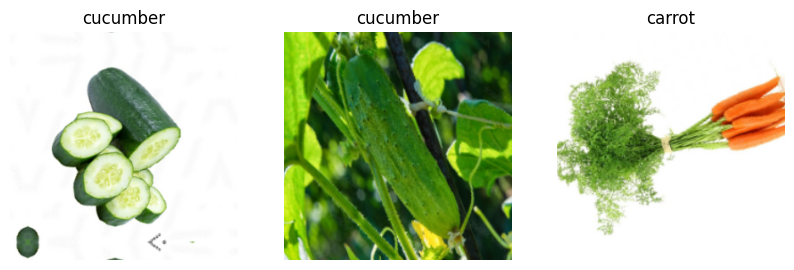

In [58]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(3):
        ax = plt.subplot(1, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Verifying image formats

In [59]:
import os
from PIL import Image

def get_image_formats(folder_path):
  image_formats = set()
  for filename in os.listdir(folder_path):
    filepath = os.path.join(folder_path, filename)
    if os.path.isfile(filepath):
      try:
        img = Image.open(filepath)
        image_formats.add(img.format)
      except IOError:
        pass # Ignore files that are not images
  return image_formats


folder1_path = "/content/datasets/carrot"
folder2_path = "/content/datasets/cucumber"

formats1 = get_image_formats(folder1_path)
formats2 = get_image_formats(folder2_path)

all_formats = formats1.union(formats2)

print("Image formats found:")
for format in all_formats:
  print(format)

Image formats found:
WEBP
JPEG
PNG


In [60]:
## Convert image formats that are not compatible with the model

import os
from PIL import Image

def convert_image_format(image_path, target_format="JPEG"):
    """Converts an image to a specified format and deletes the original if it's not allowed."""
    allowed_formats = {"JPEG", "PNG", "GIF", "BMP"}

    try:
        img = Image.open(image_path)
        if img.format in allowed_formats:
            return True  # Image is already in an allowed format

        # Convert to target format
        img = img.convert("RGB")  # Ensure RGB mode before saving
        new_image_path = os.path.splitext(image_path)[0] + "." + target_format.lower()
        img.save(new_image_path, target_format)

        # Delete the original non-allowed file
        os.remove(image_path)
        print(f"Converted {image_path} → {new_image_path} and deleted original.")

        return True
    except (IOError, OSError) as e:
        print(f"Error processing {image_path}: {e}")
        return False


def process_images_in_folder(folder_path, target_format="JPEG"):
    """Processes all images in a folder, converting non-allowed formats and deleting the originals."""
    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
        if os.path.isfile(filepath):
            convert_image_format(filepath, target_format)


# Example usage:
process_images_in_folder("/content/datasets/carrot")
process_images_in_folder("/content/datasets/cucumber")

Converted /content/datasets/carrot/360_F_234504649_ZCiqBjddczWNFgy99mZMbqCCRaDfhCM6.webp → /content/datasets/carrot/360_F_234504649_ZCiqBjddczWNFgy99mZMbqCCRaDfhCM6.jpeg and deleted original.
Converted /content/datasets/carrot/carotte-1.webp → /content/datasets/carrot/carotte-1.jpeg and deleted original.
Converted /content/datasets/carrot/i101995-carotte-nu.webp → /content/datasets/carrot/i101995-carotte-nu.jpeg and deleted original.
Converted /content/datasets/carrot/38d1df9602cb8c45d52a95974573.jpg → /content/datasets/carrot/38d1df9602cb8c45d52a95974573.jpeg and deleted original.
Converted /content/datasets/carrot/carotte-scaled.webp → /content/datasets/carrot/carotte-scaled.jpeg and deleted original.


In [61]:
import os

def rename_jfif_to_jpg(folder_path):
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".jfif"):
            old_path = os.path.join(folder_path, filename)
            new_path = os.path.join(folder_path, filename.rsplit(".", 1)[0] + ".jpg")
            os.rename(old_path, new_path)
            print(f"Renamed: {filename} → {new_path}")

rename_jfif_to_jpg("/content/datasets/carrot")
rename_jfif_to_jpg("/content/datasets/cucumber")

Renamed: images (15).jfif → /content/datasets/carrot/images (15).jpg
Renamed: images.jfif → /content/datasets/carrot/images.jpg
Renamed: images (8).jfif → /content/datasets/carrot/images (8).jpg
Renamed: images (9).jfif → /content/datasets/carrot/images (9).jpg
Renamed: téléchargement (22).jfif → /content/datasets/carrot/téléchargement (22).jpg
Renamed: téléchargement (4).jfif → /content/datasets/carrot/téléchargement (4).jpg
Renamed: images (13).jfif → /content/datasets/carrot/images (13).jpg
Renamed: téléchargement (10).jfif → /content/datasets/carrot/téléchargement (10).jpg
Renamed: images (4).jfif → /content/datasets/carrot/images (4).jpg
Renamed: téléchargement (7).jfif → /content/datasets/carrot/téléchargement (7).jpg
Renamed: images (12).jfif → /content/datasets/carrot/images (12).jpg
Renamed: images (17).jfif → /content/datasets/carrot/images (17).jpg
Renamed: images (20).jfif → /content/datasets/carrot/images (20).jpg
Renamed: téléchargement (25).jfif → /content/datasets/carro

In [62]:
print(get_image_formats("/content/datasets/carrot"))
print(get_image_formats("/content/datasets/cucumber"))

{'JPEG', 'PNG'}
{'JPEG', 'PNG'}


### Training CNN

In [63]:
from keras import layers
import tensorflow as tf
import pathlib

num_classes = 2

# Re-load dataset after file conversions
data_dir = pathlib.Path("/content/datasets/")

batch_size = 3
img_height = 256
img_width = 256
seed = 123  # Ensuring reproducibility

# Load full dataset (no validation split yet)
full_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=seed
)

# Calculate dataset sizes for partitioning
total_size = tf.data.experimental.cardinality(full_data).numpy()
train_size = int(0.70 * total_size)  # 70% training
val_size = int(0.15 * total_size)    # 15% validation
test_size = total_size - train_size - val_size  # Remaining 15% for testing

# Split the dataset
train_data = full_data.take(train_size)
remaining_data = full_data.skip(train_size)
val_data = remaining_data.take(val_size)
test_data = remaining_data.skip(val_size)  # The rest goes to the test set

# Check sizes
print(f"Train samples: {tf.data.experimental.cardinality(train_data).numpy()}")
print(f"Validation samples: {tf.data.experimental.cardinality(val_data).numpy()}")
print(f"Test samples: {tf.data.experimental.cardinality(test_data).numpy()}")


class_names = full_data.class_names
print(class_names)

Found 1635 files belonging to 2 classes.
Train samples: 381
Validation samples: 81
Test samples: 83
['carrot', 'cucumber']


In [64]:
# The scaling of the RGB values will be done in the CNN with layers.Rescaling(1./255)
full_data.as_numpy_iterator().next()[0].max()

255.0

In [65]:
# Model Definition
model = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# TensorBoard Callback
logdir = "logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=logdir,
    histogram_freq=1,
    write_images=True
)

# Train Model
hist = model.fit(
          train_data,
          validation_data=val_data,
          epochs=2,
          callbacks=[tensorboard_callback]
)

Epoch 1/2
381/381 ━━━━━━━━━━━━━━━━━━━━ 449s 1s/step - accuracy: 0.8829 - loss: 0.2735 - val_accuracy: 0.9753 - val_loss: 0.0392
Epoch 2/2
381/381 ━━━━━━━━━━━━━━━━━━━━ 437s 1s/step - accuracy: 0.9845 - loss: 0.0403 - val_accuracy: 1.0000 - val_loss: 3.7486e-04


### Plot performance

The plot isn't particularly necessary for a 2-epoch model, as we can easily observe the loss, val_loss, accuracy, and val_accuracy values above. This section is more for enhancing my understanding.

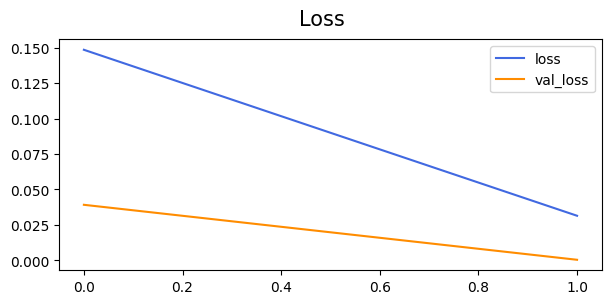

In [66]:
fig = plt.figure(figsize=(7, 3))
plt.plot(hist.history['loss'], color='royalblue', label='loss')
plt.plot(hist.history['val_loss'], color='darkorange', label='val_loss')
fig.suptitle('Loss', fontsize=15)
plt.legend(loc="upper right")
plt.show()

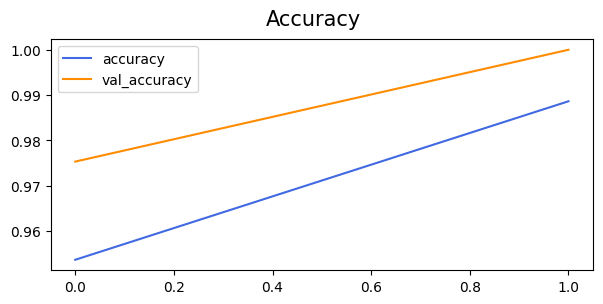

In [67]:
fig = plt.figure(figsize=(7, 3))
plt.plot(hist.history['accuracy'], color='royalblue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='darkorange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=15)
plt.legend(loc="upper left")
plt.show()

### Evaluate performance on test set

In [80]:
import tensorflow as tf
from tensorflow.keras import metrics

# Initialize metrics
precision = metrics.Precision()
recall = metrics.Recall()
binary_accuracy = metrics.BinaryAccuracy()

for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)

    # Get the predicted class by taking the argmax of the probabilities
    y_pred = tf.argmax(yhat, axis=-1)  # Predicted class (integer)

    # Update the metrics with the batch
    precision.update_state(y, y_pred)
    recall.update_state(y, y_pred)
    binary_accuracy.update_state(y, y_pred)

# Get the final metric values after the loop
final_precision = precision.result().numpy()
final_recall = recall.result().numpy()
final_binary_accuracy = binary_accuracy.result().numpy()

# Print the results
print(f"Final Precision: {final_precision}")
print(f"Final Recall: {final_recall}")
print(f"Final Binary Accuracy: {final_binary_accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

### Testing on new data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Predicted class: 0 (carrot)


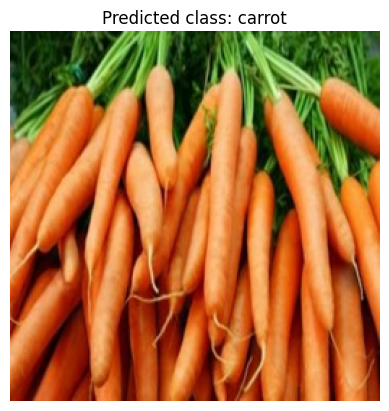

In [82]:
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Download the image
url = "https://sf2.psychologies.com/wp-content/uploads/psycho/2017/06/Mes-petits-secrets-beaute-la-carotte-2-365x200.jpg"
response = requests.get(url, stream=True)
response.raise_for_status()  # Raise an exception for bad status codes

# Save the image to a temporary file
with open("temp_image.jpg", "wb") as file:
    for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

# Load the image and preprocess it for the model
img = Image.open("temp_image.jpg").resize((img_height, img_width))  # Resize to match model input
img_array = np.array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make the prediction (model will handle rescaling)
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions[0])

# Print the prediction
print(f"Predicted class: {predicted_class} ({class_names[predicted_class]})")

# Optional: Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted class: {class_names[predicted_class]}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted class: 1 (cucumber)


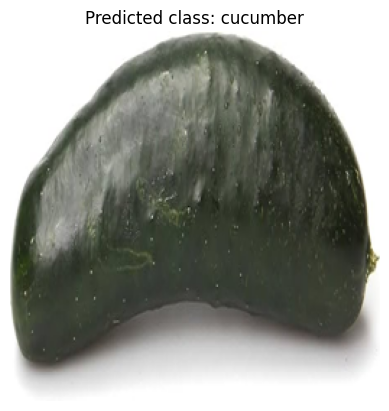

In [83]:
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Download the image
url = "https://m.media-amazon.com/images/I/71ZWhcQoYwL._AC_UF894,1000_QL80_.jpg"
response = requests.get(url, stream=True)
response.raise_for_status()  # Raise an exception for bad status codes

# Save the image to a temporary file
with open("temp_image.jpg", "wb") as file:
    for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

# Load the image and preprocess it for the model
img = Image.open("temp_image.jpg").resize((img_height, img_width))  # Resize to match model input
img_array = np.array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make the prediction (model will handle rescaling)
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions[0])

# Print the prediction
print(f"Predicted class: {predicted_class} ({class_names[predicted_class]})")

# Optional: Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted class: {class_names[predicted_class]}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted class: 0 (carrot)


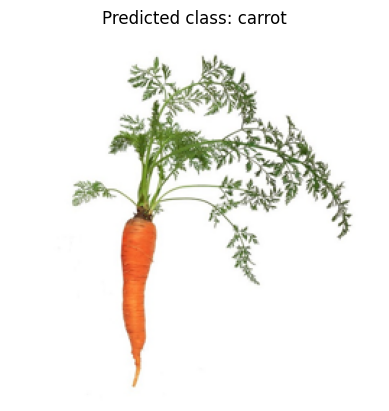

In [84]:
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Download the image
url = "https://insectosphere.fr/img/cms/semences-biologiques/carottes/carotte-entiere.jpg"
response = requests.get(url, stream=True)
response.raise_for_status()  # Raise an exception for bad status codes

# Save the image to a temporary file
with open("temp_image.jpg", "wb") as file:
    for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

# Load the image and preprocess it for the model
img = Image.open("temp_image.jpg").resize((img_height, img_width))  # Resize to match model input
img_array = np.array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make the prediction (model will handle rescaling)
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions[0])

# Print the prediction
print(f"Predicted class: {predicted_class} ({class_names[predicted_class]})")

# Optional: Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted class: {class_names[predicted_class]}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted class: 0 (carrot)


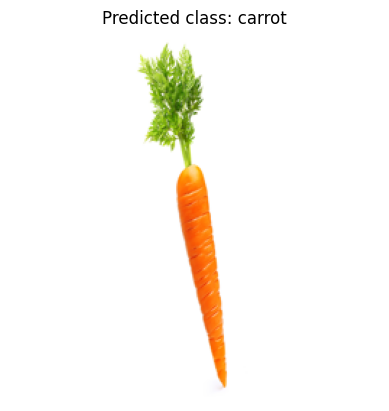

In [85]:
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Download the image
url = "https://www.aprifel.com/wp-content/uploads/2019/02/carotte.jpg"
response = requests.get(url, stream=True)
response.raise_for_status()  # Raise an exception for bad status codes

# Save the image to a temporary file
with open("temp_image.jpg", "wb") as file:
    for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

# Load the image and preprocess it for the model
img = Image.open("temp_image.jpg").resize((img_height, img_width))  # Resize to match model input
img_array = np.array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make the prediction (model will handle rescaling)
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions[0])

# Print the prediction
print(f"Predicted class: {predicted_class} ({class_names[predicted_class]})")

# Optional: Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted class: {class_names[predicted_class]}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted class: 1 (cucumber)


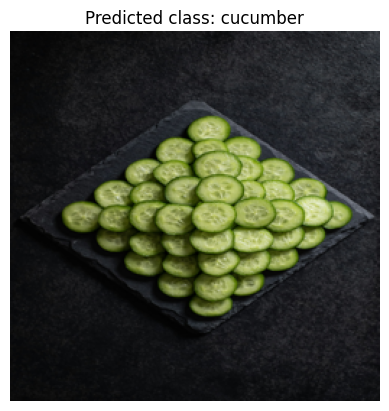

In [86]:
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Download the image
url = "https://images.unsplash.com/photo-1627981906592-ae3f0ee9486d?q=80&w=1988&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
response = requests.get(url, stream=True)
response.raise_for_status()  # Raise an exception for bad status codes

# Save the image to a temporary file
with open("temp_image.jpg", "wb") as file:
    for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

# Load the image and preprocess it for the model
img = Image.open("temp_image.jpg").resize((img_height, img_width))  # Resize to match model input
img_array = np.array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make the prediction (model will handle rescaling)
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions[0])

# Print the prediction
print(f"Predicted class: {predicted_class} ({class_names[predicted_class]})")

# Optional: Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted class: {class_names[predicted_class]}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Predicted class: 1 (cucumber)


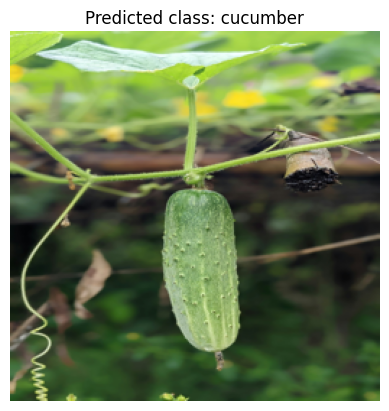

In [88]:
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Download the image
url = "https://images.unsplash.com/photo-1676043966926-c575c1ef320a?q=80&w=2127&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
response = requests.get(url, stream=True)
response.raise_for_status()  # Raise an exception for bad status codes

# Save the image to a temporary file
with open("temp_image.jpg", "wb") as file:
    for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

# Load the image and preprocess it for the model
img = Image.open("temp_image.jpg").resize((img_height, img_width))  # Resize to match model input
img_array = np.array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make the prediction (model will handle rescaling)
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions[0])

# Print the prediction
print(f"Predicted class: {predicted_class} ({class_names[predicted_class]})")

# Optional: Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted class: {class_names[predicted_class]}")
plt.axis("off")
plt.show()

### Conclusion

The model has pretty good performance, with a **precision of 0.98**, a **recall of 0.99**, and a **binary accuracy of 0.99** on the test set.